## Model training and testing

In [22]:
import joblib
import matplotlib.pyplot as plt
import sklearn
import numpy as np

from generate_data import train_model
from generate_data import load_data
from generate_data import merge_data

In [23]:
# Train on generated data
set_name = 'data'

input_data, output_data = merge_data("data")
#input_data, output_data = load_data("training_set_91")

train_model(set_name, MERGE=True)

"32 608 608 2 2"

estimator = joblib.load('estimator.pkl')

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...


[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    2.2s remaining:    5.2s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    2.8s remaining:    1.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    3.2s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.5s remaining:    1.2s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.9s remainin

Training: R2 = 0.6800167459820142, MAE = 1.4718975810559001e-05
Test: R2 = -0.07238714409964686, MAE = 3.0169993301760273e-05


In [24]:
estimator = joblib.load('estimator.pkl')

In [25]:
print(input_data.shape) # [N_SAMPLE][OPTIC_FUNCT]
print(output_data.shape) # [N_SAMPLE][MAGNET ERROR]
#triplet_errors, arc_errors_b1, arc_errors_b2, mqt_errors_b1, mqt_errors_b2

(509, 3341)
(509, 1248)


In [26]:
predicted_errors = np.hstack(estimator.predict(input_data)[:,:32])
true_errors = np.hstack(output_data[:,:32])

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.7s remaining:    1.6s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.4s finished


In [27]:
print(predicted_errors.shape)

(16288,)


In [28]:
print(max(predicted_errors))

0.0001500234373944918


In [29]:
print(true_errors.shape)

(16288,)


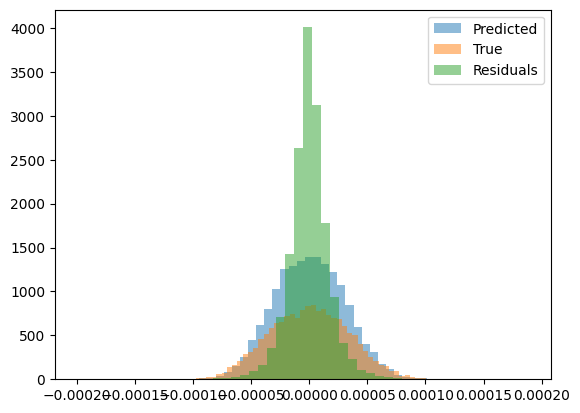

In [30]:
#Example histogram for the errors for a single simulation.

plt.hist(predicted_errors, alpha = 0.5, bins=50,label="Predicted")
plt.hist(true_errors, alpha = 0.5, bins=50, label="True")
plt.hist(predicted_errors-true_errors, alpha=0.5, bins=50, label="Residuals")
plt.legend()
plt.show()

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    4.1s remaining:    9.6s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    4.9s remaining:    2.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    5.2s finished


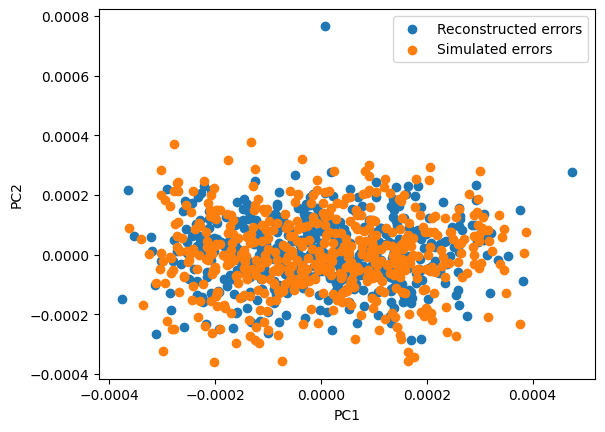

In [31]:
#PCA visualization of the simulated magnet errors and reconstruction, 
# for an unbiased regression a similar distribution is expected, for an 
# accurate regression the spread should be similar 

pca = sklearn.decomposition.PCA(n_components=2)
 
predicted_data = estimator.predict(input_data)

pca.fit(output_data) # Fitting PCA decomposition to extract the most important components of the simulation data

pred_red_data = pca.transform(predicted_data)
output_red_data = pca.transform(output_data)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(pred_red_data[:,0], pred_red_data[:,1], label="Reconstructed errors")
plt.scatter(output_red_data[:,0], output_red_data[:,1], label="Simulated errors")
plt.legend()

In [1]:
from madx_jobs import madx_ml_op
import matplotlib.pyplot as plt


In [2]:
mdx = madx_ml_op()
mdx.job_nominal2023()
nominal_twiss_b2 = mdx.table.twiss.dframe()
mdx.quit()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2023.03.27 15:56:34      +
  ++++++++++++++++++++++++++++++++++++++++++++
++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: load_main_sequence
++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: match_tunes_arc_squeeze
++++++ warning: macro redefined: load_average_error_table
++++++ warning: macro redefined: set_crossing_scheme_on
++++++ warning: macro redefined: set_default_crossing_scheme
++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqx

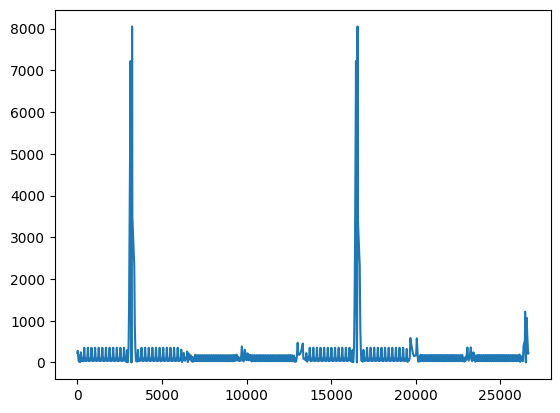

In [3]:
plt.plot(nominal_twiss_b2.s, nominal_twiss_b2.betx)

In [4]:
mdx = madx_ml_op()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2023.03.27 15:56:52      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [5]:
OPTICS_30CM_2023 = '/afs/cern.ch/user/a/aborjess/work/private/models/LHCB1/B1_30cm_flat/modifiers.madx'
index = 0
seed = 1000000

mdx.job_magneterrors_b1(OPTICS_30CM_2023, str(index), seed)
b1_tw_before_match = mdx.table.twiss.dframe() # Twiss before match
mdx.match_tunes_b1()

b1_tw_after_match = mdx.table.twiss.dframe()# Twiss after match
mdx.generate_twiss_train_b1()

twiss_data_b1 = mdx.table.twiss.dframe() # Relevant to training Twiss data
common_errors = mdx.table.cetab.dframe() # Errors for both beams, triplet errors
b1_errors = mdx.table.etabb1.dframe() # Table error for MQX magnets

mdx.job_magneterrors_b2(OPTICS_30CM_2023, str(index), seed)

b2_tw_before_match = mdx.table.twiss.dframe() # Twiss before match

mdx.match_tunes_b2()

b2_tw_after_match = mdx.table.twiss.dframe()# Twiss after match

mdx.generate_twiss_train_b2()

twiss_data_b2 = mdx.table.twiss.dframe() # Relevant to training Twiss data
b2_errors= mdx.table.etabb2.dframe() # Table error for MQX magnets    

++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: load_main_sequence
++++++ warning: macro redefined: coupling_knob
++++++ warning: macro redefined: match_tunes
++++++ warning: macro redefined: match_tunes_arc_squeeze
++++++ warning: macro redefined: load_average_error_table
++++++ warning: macro redefined: set_crossing_scheme_on
++++++ warning: macro redefined: set_default_crossing_scheme
++++++ warning: implicit element re-definition ignored: ip1
++++++ warning: implicit element re-definition ignored: mbas2.1r1
++++++ warning: implicit element re-definition ignored: tas.1r1
++++++ warning: implicit element re-definition ignored: mqxa.1r1
++++++ warning: implicit element re-definition ignored: mcbxh.1r1
++++++ warning: implicit element re-definition ignored: mcbxv.1r1
++++++ warning: implicit element re-definition ignored: mqxb.a2r1
++++++ warning: implicit element re-definition ignored: mcbxh.2r1
++++++ warnin

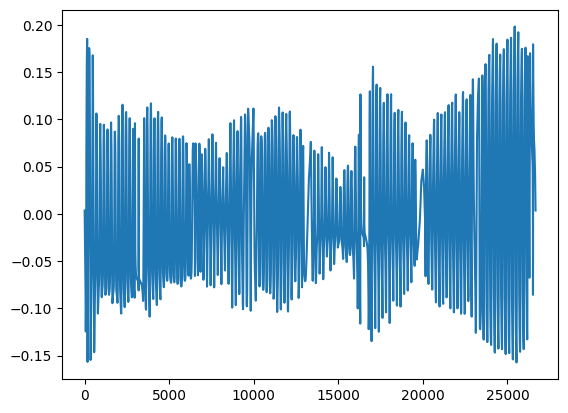

In [6]:
plt.plot(b2_tw_before_match.s, (b2_tw_before_match.betx-nominal_twiss_b2.betx)/nominal_twiss_b2.betx)

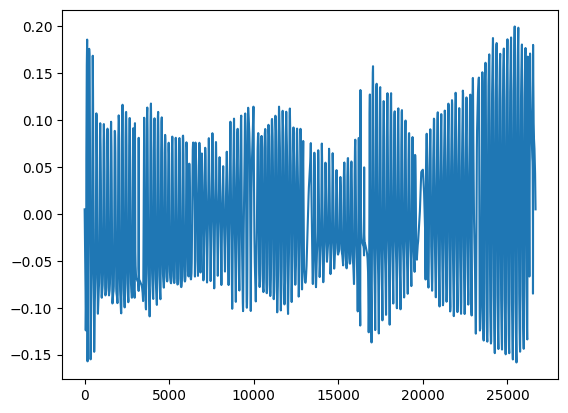

In [7]:
plt.plot(b2_tw_after_match.s, (b2_tw_after_match.betx-nominal_twiss_b2.betx)/nominal_twiss_b2.betx)

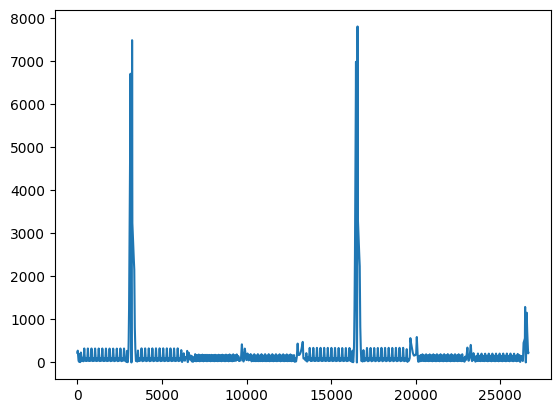

In [8]:
plt.plot(b2_tw_after_match.s, b2_tw_after_match.betx)

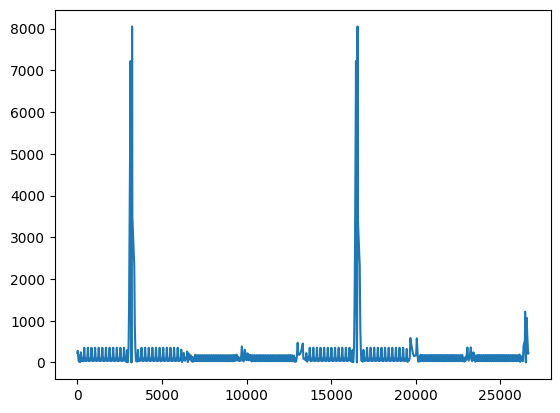

In [9]:
plt.plot(nominal_twiss_b2.s, nominal_twiss_b2.betx)